<a href="https://colab.research.google.com/github/saishshinde15/NLP/blob/main/Text_MultiClass_classification_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
!wget -nc https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv


--2024-03-28 11:11:04--  https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5085081 (4.8M) [text/csv]
Saving to: ‘bbc_text_cls.csv’

bbc_text_cls.csv    100%[===================>]   4.85M  11.7MB/s    in 0.4s    

2024-03-28 11:11:05 (11.7 MB/s) - ‘bbc_text_cls.csv’ saved [5085081/5085081]



In [3]:
dataset=pd.read_csv('bbc_text_cls.csv')

In [4]:
dataset

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business
...,...,...
2220,BT program to beat dialler scams\n\nBT is intr...,tech
2221,Spam e-mails tempt net shoppers\n\nComputer us...,tech
2222,Be careful how you code\n\nA new European dire...,tech
2223,US cyber security chief resigns\n\nThe man mak...,tech


In [5]:
dataset['labels'].unique()

array(['business', 'entertainment', 'politics', 'sport', 'tech'],
      dtype=object)

In [6]:
dataset.isnull().sum()

text      0
labels    0
dtype: int64

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2225 non-null   object
 1   labels  2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


<Axes: xlabel='count', ylabel='labels'>

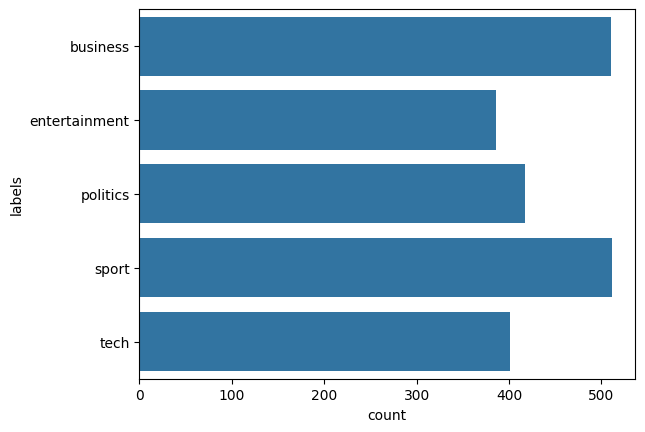

In [8]:
sns.countplot(dataset['labels'])

In [9]:
X=dataset['text']

In [10]:
X

0       Ad sales boost Time Warner profit\n\nQuarterly...
1       Dollar gains on Greenspan speech\n\nThe dollar...
2       Yukos unit buyer faces loan claim\n\nThe owner...
3       High fuel prices hit BA's profits\n\nBritish A...
4       Pernod takeover talk lifts Domecq\n\nShares in...
                              ...                        
2220    BT program to beat dialler scams\n\nBT is intr...
2221    Spam e-mails tempt net shoppers\n\nComputer us...
2222    Be careful how you code\n\nA new European dire...
2223    US cyber security chief resigns\n\nThe man mak...
2224    Losing yourself in online gaming\n\nOnline rol...
Name: text, Length: 2225, dtype: object

In [11]:
y=dataset['labels'].values

In [12]:
y

array(['business', 'business', 'business', ..., 'tech', 'tech', 'tech'],
      dtype=object)

In [13]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y


array([0, 0, 0, ..., 4, 4, 4])

In [14]:
from sklearn.model_selection import train_test_split
X_train_input, X_test_input, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
len(X_train_input)

1780

In [16]:
len(y_train)

1780

In [17]:
vectorizer=TfidfVectorizer(analyzer='word')

In [18]:
X_train=vectorizer.fit_transform(X_train_input)
X_test=vectorizer.transform(X_test_input)

In [19]:
X_train=X_train.toarray()
X_test=X_test.toarray()

In [20]:
ann=tf.keras.models.Sequential()

In [21]:
n_input=X_train.shape[1]

In [22]:
ann.add(tf.keras.layers.Dense(units=100,input_dim=n_input,activation='relu'))

In [23]:
ann.add(tf.keras.layers.Dropout(rate=0.5))

In [24]:
ann.add(tf.keras.layers.Dense(units=100,activation='relu'))

In [25]:
ann.add(tf.keras.layers.Dropout(rate=0.5))

In [26]:
ann.add(tf.keras.layers.Dense(units=5,activation='softmax'))

In [27]:
ann.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'],run_eagerly=True) #(from_logits=False) using =False because activation is softmax, if we change it into linear then we use =True(refer adavance laerning notes multiclass in note app)

In [28]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

In [29]:
# Assuming X_test is a string
X_test = np.array(X_test)

# Assuming y_test is a string
y_test = np.array(y_test)


In [30]:
history=ann.fit(X_train,y_train,batch_size=32,epochs=10,validation_data=(X_test,y_test),callbacks=[early_stopping])

Epoch 1/10
56/56 [==============================] - 14s 230ms/step - loss: 1.4492 - accuracy: 0.5382 - val_loss: 1.0007 - val_accuracy: 0.8247
Epoch 2/10
56/56 [==============================] - 8s 138ms/step - loss: 0.5859 - accuracy: 0.8961 - val_loss: 0.1849 - val_accuracy: 0.9730
Epoch 3/10
56/56 [==============================] - 8s 152ms/step - loss: 0.1349 - accuracy: 0.9854 - val_loss: 0.0884 - val_accuracy: 0.9708
Epoch 4/10
56/56 [==============================] - 7s 129ms/step - loss: 0.0544 - accuracy: 0.9961 - val_loss: 0.0777 - val_accuracy: 0.9685
Epoch 5/10
56/56 [==============================] - 8s 136ms/step - loss: 0.0295 - accuracy: 0.9966 - val_loss: 0.0705 - val_accuracy: 0.9775
Epoch 6/10
56/56 [==============================] - 7s 130ms/step - loss: 0.0188 - accuracy: 0.9994 - val_loss: 0.0703 - val_accuracy: 0.9685
Epoch 7/10
56/56 [==============================] - 7s 117ms/step - loss: 0.0121 - accuracy: 0.9994 - val_loss: 0.0770 - val_accuracy: 0.9685
Epoch

In [31]:
ann.evaluate(X_train,y_train)

56/56 [==============================] - 2s 34ms/step - loss: 1.9367e-04 - accuracy: 1.0000


[0.00019366647757124156, 1.0]

In [32]:
ann.evaluate(X_test,y_test)

14/14 [==============================] - 0s 17ms/step - loss: 0.0803 - accuracy: 0.9730


[0.08027855306863785, 0.9730337262153625]

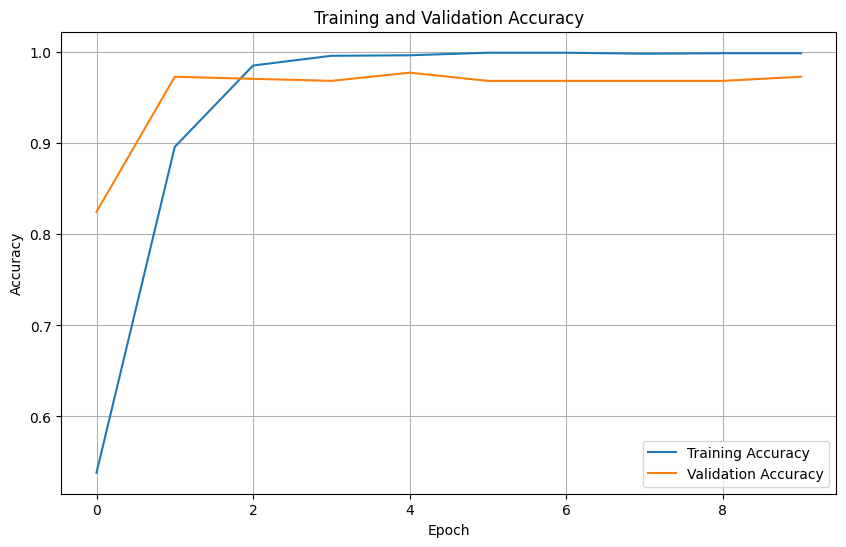

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

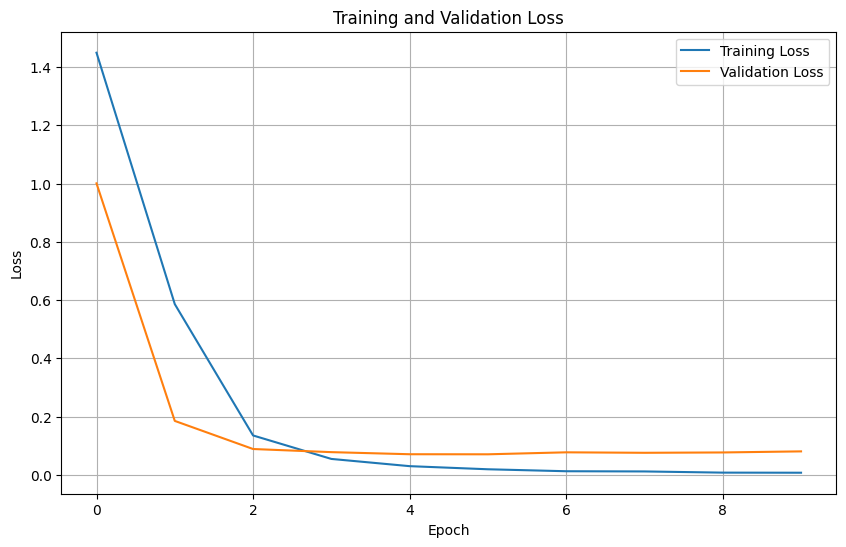

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [36]:
from sklearn.metrics import confusion_matrix

14/14 [==============================] - 0s 7ms/step


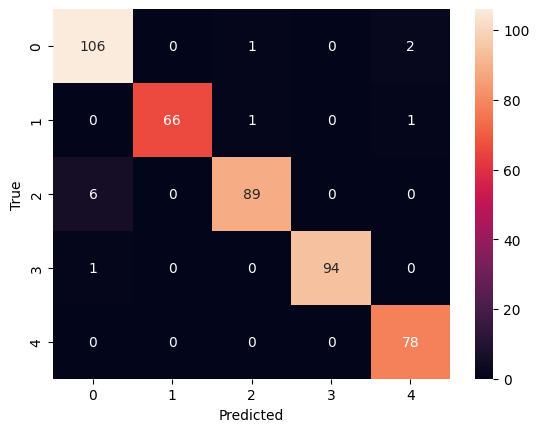

In [37]:
# Predict the labels for the test data
y_pred = ann.predict(X_test)

# Convert the predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
